# Working with decision trees + exploratory data analysis  

## Can we try to predict the *Quality* of a wine from it's features?



### Setup
We'll use the wine quality dataset.  
If you have not downloaded it already, do it now from: https://archive.ics.uci.edu/ml/datasets/Wine+Quality  


_Once downloaded, create a folder 'data' in the same folder as this notebook, create another folder in 'data' called 'wine' and copy the files into 'wine'._

Also, since we'll visualize directed graphs (decision trees), let's install Graphviz.

1. From the command prompt, fire:  
`conda install python-graphviz`  
1. Once this is done, start the Jupyter Notebook:  
` jupyter notebook`
1. _Create a new notebook where you can repeat the steps that are listed in this one_

In [1]:
# import basic libraries
import numpy as np
import matplotlib
import pandas as pd
import seaborn
import os

In [2]:
red_wine_file = "./data/wine/winequality-red.csv"
# Just check if the file you've entered is at the right path...
# print (os.path.abspath(red_wine_file))
# Load the CSV data into a dataframe - notice haw we have specified the delimiter
red_wine_data = pd.read_csv(red_wine_file, sep=";")
# Describe the data in the file - this returns a dataframe
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Obsesrvations:
- We see that the data in some columns is spread out (like 'free sulfur dioxide' and 'total sulfur dioxide' columns)  
- ...and is fairly close to the average in others (like the 'density' column).  

##### An intution about the percentiles
Let's say we sort the entire red wine data on a column, say pH, in ascending order.
The top of the list will then be the minimum value of pH, traversing 25% down the list will be the 25th percentile value, the 50th percentile in the middle, then the 75th percentile and the last record will indicate the highest pH.  
Let's look at some raw data and plot some of it:

In [3]:
# list the top 5 rows of the red wine data
red_wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# list the last 5 rows of the red wine data
red_wine_data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# value_counts() gives the count of uniue values in a dataset
# print(red_wine_data["pH"].value_counts())

In [6]:
red_wine_desc=red_wine_data.describe()

'''
# if you want to explore the internals of the describe() dict
# Here's how the describe dict is structured:
# keys
print(red_wine_desc['pH'])
# columns in each record
print(red_wine_desc['pH']['std'])
# how would one access all the values of standard deviation for all keys?
print([(element,type(element), red_wine_desc[element]['std']) for element in red_wine_desc])
std_list = [red_wine_desc[element]['std'] for element in red_wine_desc]
std_list'''

"\n# if you want to explore the internals of the describe() dict\n# Here's how the describe dict is structured:\n# keys\nprint(red_wine_desc['pH'])\n# columns in each record\nprint(red_wine_desc['pH']['std'])\n# how would one access all the values of standard deviation for all keys?\nprint([(element,type(element), red_wine_desc[element]['std']) for element in red_wine_desc])\nstd_list = [red_wine_desc[element]['std'] for element in red_wine_desc]\nstd_list"

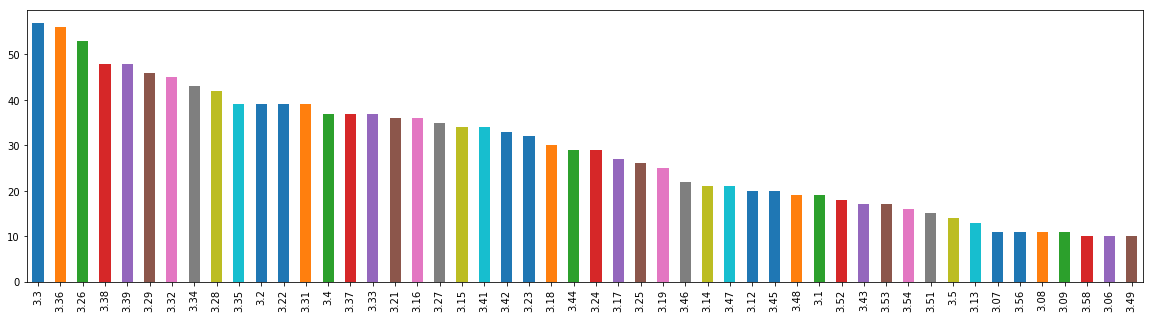

In [7]:
# plot the # of unique occurances for pH values
red_wine_data["pH"].value_counts().head(50).plot(kind='bar',figsize=(20,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B37F67AC88>,
      dtype=object)

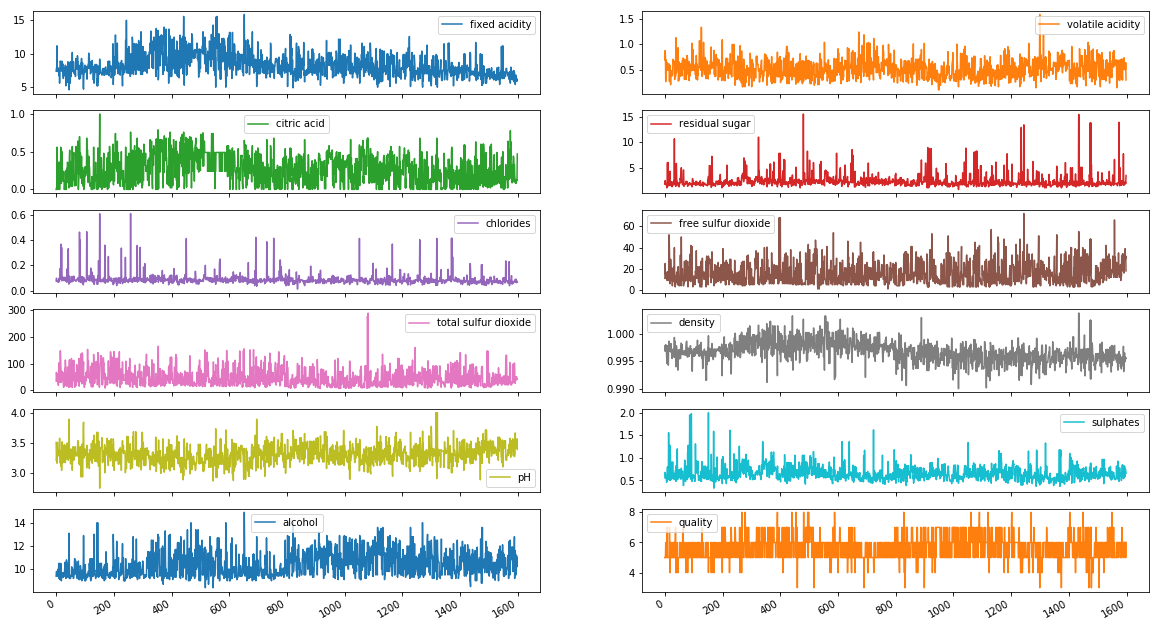

In [8]:
# plot the movement of features for all observations
red_wine_data.plot(kind='line',figsize=(20,20),subplots=True,layout=(10,2))

In [9]:
# (unhelpful) - histograms for everything:
# red_wine_data.plot(kind='hist',figsize=(20,30),subplots=True,layout=(10,3))

let's dig deeper

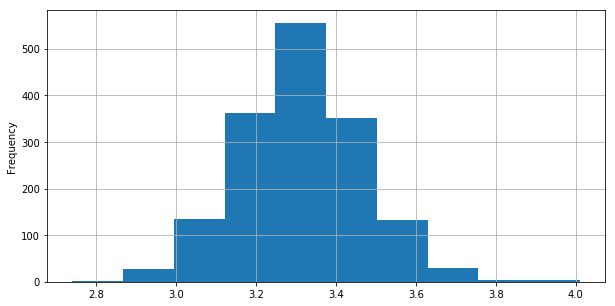

In [10]:
# histogram for just pH
red_wine_data["pH"].plot(kind='hist',figsize=(10,5), grid=True, bins=10)

In [11]:
# skew 
red_wine_data["pH"].skew()

0.19368349811284427

In [12]:
# kurtosis
red_wine_data["pH"].kurt()

0.806942508246574

#### Observations
- most of the wines have a pH between 3.2 and 3.4
- very few are highly acidic (close to 2.0) or very neutral (close to 4.0)
- It seems that there's a slight skew towards higher acidity - more wines have acidity closer to 2.0 than to 4.0
- Positive values of skew means data is **skewed right**
  - *right* here means that the right tail is *longer* than the left tail
- Negative values would mean data is skewed left, but that's not what we are observing...
- Kurtosis calculated is 'excess kurtosis' - its a measure of how long the tails are, positive meaning heavy tails, negative - light tails, in this case it seems that the tails of our normal distribution tend towards the heavier side

#### Note
The 'skew' is also called the Fisher-Pearson coefficient.
Here is a good explanation of skew and kurtosis: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

#### Similarly, for 'quality'

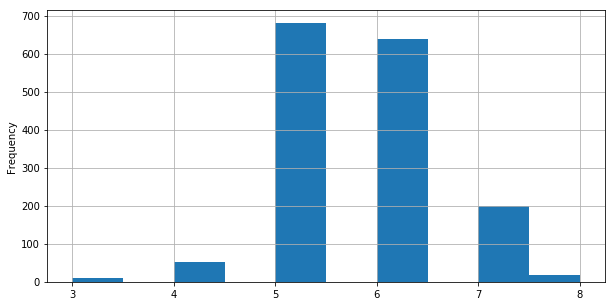

In [13]:
# histogram for just quality
red_wine_data["quality"].plot(kind='hist',figsize=(10,5), grid=True)

In [14]:
# skew 
red_wine_data["quality"].skew()

0.21780157547366327

In [15]:
# kurtosis
red_wine_data["quality"].kurt()



0.2967081197538759

#### Observations
- For the samples where we know the quality, it seems the tails are not as heavy (kurtosis is low compared to pH above), and so overall the skew is still rightwards

## Selecting data for modelling

We first split our dataset into two parts, one will be used to train the model, the other to test it.

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

# split data into 75:25 - we use 75% of data to train and 25% to test our model
# give it a fixed random_state so that the data splits the same way each time the code ir run, giving us consistent results
red_wine_train_data, red_wine_test_data = train_test_split(red_wine_data, test_size=0.25,random_state=11)
print(len(red_wine_train_data), len(red_wine_test_data))
# red_wine_test_data.describe()  

1199 400


In [17]:
# red_wine_train_data.describe()

Now we can't use all available columns to build a model that can predict the quality of a wine. 
- Some of the features may have very little impact on quality
- It would be computationally expensive and inefficient to build a model with so many features.

So let's select some that show large correlation *and* vary a lot

_Note: there are better ways of selecting features, we are using intution here for simplicity's sake_

Let's start by thinking about some questions:
- What does the quality of a wine depend upon?
- how does the quality of a wine correlate to the various features we have observed?

In [18]:
# let's compute the correlation matrix to see which features strongly correlate to each other
red_wine_corr = red_wine_train_data.corr()
red_wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.278803,0.676460,0.097506,0.093502,-0.166242,-0.142059,0.650498,-0.688970,0.180888,-0.059287,0.159363
volatile acidity,-0.278803,1.000000,-0.563711,0.037281,0.052372,-0.002784,0.096481,0.013119,0.225942,-0.275145,-0.211006,-0.412873
citric acid,0.676460,-0.563711,1.000000,0.116974,0.208120,-0.081086,-0.009650,0.346938,-0.535095,0.313341,0.123838,0.272161
residual sugar,0.097506,0.037281,0.116974,1.000000,0.049824,0.179200,0.201878,0.340889,-0.052002,0.017125,0.064078,-0.012166
chlorides,0.093502,0.052372,0.208120,0.049824,1.000000,-0.009945,0.048517,0.198199,-0.259287,0.345823,-0.235160,-0.102027
free sulfur dioxide,-0.166242,-0.002784,-0.081086,0.179200,-0.009945,1.000000,0.676745,-0.027181,0.077366,0.038541,-0.071492,-0.060680
total sulfur dioxide,-0.142059,0.096481,-0.009650,0.201878,0.048517,0.676745,1.000000,0.056760,-0.039273,0.047186,-0.196414,-0.193999
density,0.650498,0.013119,0.346938,0.340889,0.198199,-0.027181,0.056760,1.000000,-0.321822,0.150149,-0.514332,-0.153635
pH,-0.688970,0.225942,-0.535095,-0.052002,-0.259287,0.077366,-0.039273,-0.321822,1.000000,-0.185617,0.192204,-0.084927
sulphates,0.180888,-0.275145,0.313341,0.017125,0.345823,0.038541,0.047186,0.150149,-0.185617,1.000000,0.088503,0.273363


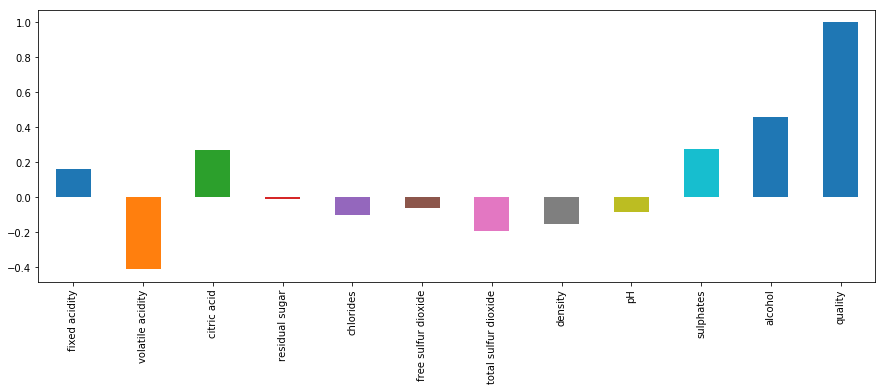

In [19]:
# the matrix is cool, but a visual is cooler
# lets find out how the quality correlates to each of the features
red_wine_corr['quality'].plot(kind='bar',figsize=(15,5))

#### Observations
- amount of fixed acidity, citric acid, sulphates and alcohol seem to **positively** correlate with quality - so an increase in these may improve the quality - we'll have to check.
- amount of volatile acidity, chlorides, total sulfur dioxide and the density of the liquid seem to **negatively** correlate with quality - so an increase in these may reduce the quality - we'll have to check.

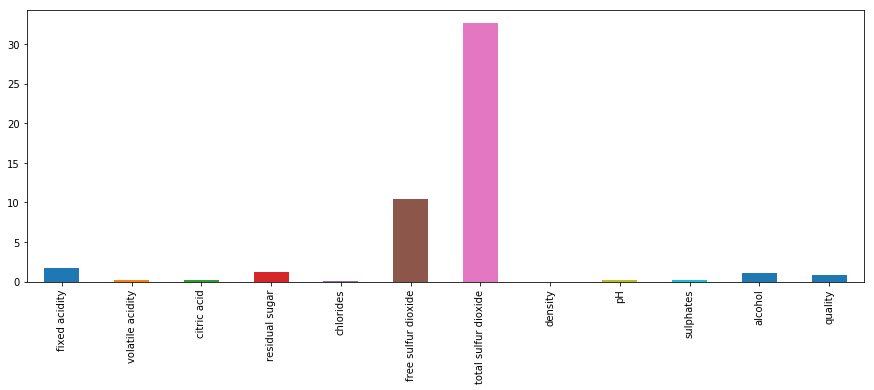

In [20]:
# and the standard deviation for each feature
red_wine_train_data.std().plot(kind='bar', figsize=(15,5))

#### Observations
- for the positive correlations
  - fixed acidity: seems to change by a significant amount, so may be useful for our model
  - citric acid: seems to change very little, it appears this may not be as useful, will revisit this if our model is not accurate enough
  - sulphates: ditto sulphates - change very little, so we'll remember this, but not use in our model upfront
  - alcohol: again seems significant - let's keep it
- for the negative correlations
  - volatile acidity: low change, let's ignore for now
  - chlorides: low change, let's ignore for now
  - total sulfur dioxide: huge change! let's consider this for our model
  - density: very little change, let's ignore for now
  
#### Initial selection
Based on our anaysis, we'd like to select the following features for the purposes of modelling:
- fixed acidity
- alcohol
- total sulfur dioxide  

Also, remember that our **prediction target** is the *quality* of the wine.

In [21]:
# prediction target or 'y'
y = red_wine_train_data['quality']

# chosen features
interesting_features = ['fixed acidity','alcohol','total sulfur dioxide']
X = red_wine_train_data[interesting_features]
# want to look at X?
# X.head()
X.describe()

,fixed acidity,alcohol,total sulfur dioxide
count,1199.000000,1199.000000,1199.000000
mean,8.348457,10.407465,46.441618
std,1.759727,1.075729,32.662825
min,4.600000,8.400000,6.000000
25%,7.100000,9.500000,22.000000
50%,7.900000,10.100000,38.000000
75%,9.300000,11.083333,62.500000
max,15.900000,14.900000,278.000000


## Building the Model

The meat-and-potatoes of modelling can be broken into four steps
1. **Define the model** - in our case we are using 'Decision Trees' to classify. We'll use decision trees to arrive at a class (0,1,2,3,4,5,6,7,8,9 or 10) that represents the quality of the wine. The decision trees will be use entropy as the criterion to split the nodes.
1. **Fit** - this is where the magic happens - for the current tutorial, this amounts to defining the hyperparameters for the decision tree and running the algorithm on the dataset
1. **Predict** - once we have a fit, we want to try it on the 'test' data - make predictions
1. **Evaluate** - We know the actual values of quality in the 'test' data, we compare these to the predicted values and find out how our model performed. If the accuracy is low, we'd need to tune the hyperparameters and use other methods like ensemble learning.  

A great explanation of how the decision tree algorithm works fundamentally is here: https://www.python-course.eu/Decision_Trees.php

_We'll have a separate notebook that will allow us to practice the decision tree **algorithm**, this notebook is focussed on building the model and related tasks._  

In [22]:
# import scikit learn
from sklearn import tree

# 1. DEFINE THE MODEL
# hyperparameters defined in the classifier
classifier = tree.DecisionTreeClassifier(criterion="entropy", 
                                         max_depth=3, 
                                         min_samples_split=120, 
                                         min_samples_leaf=30, 
                                         presort=False )

# 2. FIT
red_wine_classification = classifier.fit(X,y)

# Prep for step 3
# check the test data that we split earlier 
y_actual = red_wine_test_data["quality"]
# print(y_actual)
red_wine_test_data_subset = red_wine_test_data[interesting_features]

# 3. PREDICT ON TEST DATA
#just predictions
y_hat = red_wine_classification.predict(red_wine_test_data_subset)
y_hat

array([6, 5, 6, 6, 5, 5, 7, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 7, 6, 5, 5, 5,
       5, 7, 6, 6, 6, 5, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5,
       6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5,
       7, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 7, 6, 6, 6, 6, 7, 6,
       5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 7, 5, 6, 5, 5, 5, 5, 5,
       7, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6,
       5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6,
       6, 7, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 7, 5, 5, 7, 6, 5, 7, 6, 5, 6, 5, 5, 6, 6, 5, 5,
       5, 7, 5, 7, 7, 6, 5, 6, 6, 6, 6, 5, 7, 5, 5,

In [23]:
# if you want probabilities
# red_wine_classification.predict_proba(white_wine_data)

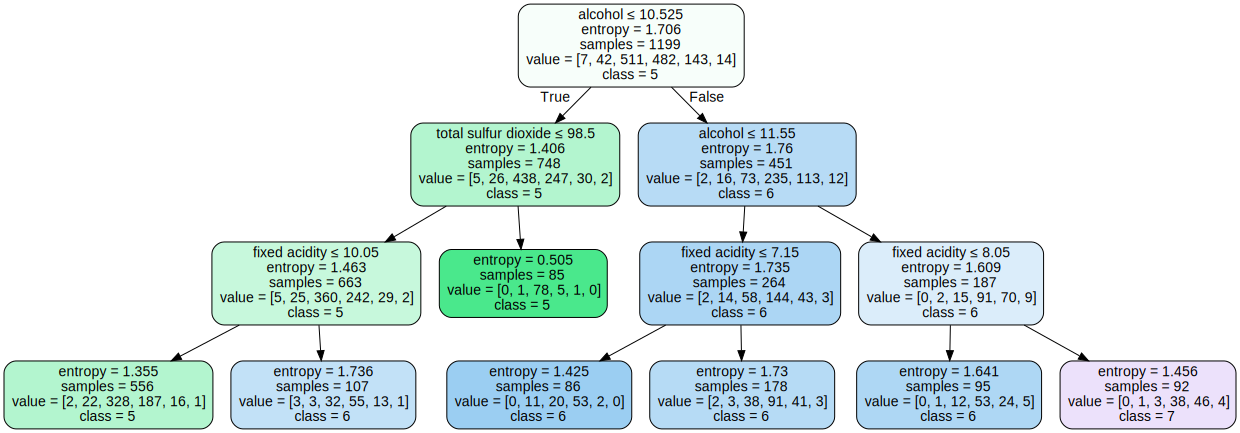

In [24]:
# let's visualize what the tree looks like
import graphviz
y_unique_labels = red_wine_train_data['quality'].sort_values().unique()
class_names_list = [str(e) for e in y_unique_labels.tolist()]
dot_data = tree.export_graphviz(red_wine_classification, out_file=None,
                               feature_names=X.columns.tolist(),
                                class_names=class_names_list,
                                filled=True,
                                leaves_parallel=False,
                                rounded=True, special_characters=True)
with open("tree.dot", "w") as tree_dot:
    tree_dot.write(dot_data)
    
red_wine_decision_tree = graphviz.Source(dot_data)
red_wine_decision_tree

How accurate is our model?
Lets find out by looking at the confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 4. EVALUATE THE MODEL'S PERFORMANCE
cnf_matrix = confusion_matrix(y_actual, y_hat)
accuracy = accuracy_score(y_actual, y_hat)
print(cnf_matrix)
print(accuracy)

[[  0   0   2   1   0   0]
 [  0   0   6   5   0   0]
 [  0   0 125  44   1   0]
 [  0   0  68  77  11   0]
 [  0   0   6  33  17   0]
 [  0   0   0   2   2   0]]
0.5475


In [26]:
# not very accurate, so let's do round 2
# let's add the columns we had ignored earlier
interesting_features_r2 = ['fixed acidity', 'volatile acidity','citric acid', 'chlorides','total sulfur dioxide', 'density', 'sulphates', 'alcohol']

# create round 2 data set for training
X_r2 = red_wine_train_data[interesting_features_r2]
# 1. DEFINE is still the same from round 1
# 2. FIT round 2 data
red_wine_classification_r2 = classifier.fit(X_r2,y)
# Prep for step 3 (round 2)
red_wine_test_data_subset_r2 = red_wine_test_data[interesting_features_r2]
# 3. PREDICT for round 2

#just predictions
y_hat_r2 = red_wine_classification_r2.predict(red_wine_test_data_subset_r2)
y_hat_r2

array([6, 5, 6, 6, 5, 5, 7, 5, 6, 6, 5, 7, 5, 6, 5, 5, 5, 7, 6, 5, 5, 5,
       5, 7, 6, 6, 6, 5, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5,
       6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7,
       6, 5, 6, 6, 5, 5, 6, 7, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5,
       7, 5, 7, 7, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 7, 7, 7, 6, 6, 6, 7, 6,
       5, 7, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5,
       7, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6,
       5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6,
       6, 7, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 7, 6, 5, 6, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 7, 5, 5, 6, 6, 5, 6, 7, 5, 7, 5, 5, 6, 6, 5, 5,
       5, 6, 5, 7, 7, 6, 5, 6, 6, 6, 6, 5, 7, 5, 5,

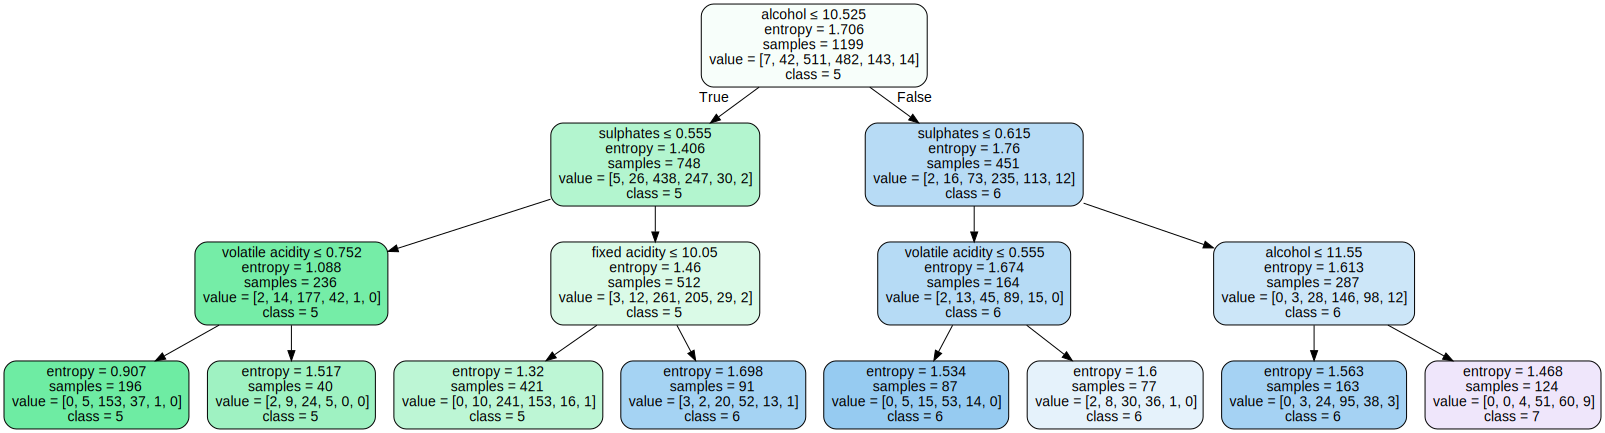

In [27]:
# let's visualize the round 2 decision tree...
dot_data_r2 = tree.export_graphviz(red_wine_classification_r2, out_file=None,
                               feature_names=X_r2.columns.tolist(),
                                class_names=class_names_list,
                                filled=True,
                                leaves_parallel=False,
                                rounded=True, special_characters=True)
with open("tree2.dot", "w") as tree_dot_r2:
    tree_dot_r2.write(dot_data_r2)
    
red_wine_decision_tree_r2 = graphviz.Source(dot_data_r2)
red_wine_decision_tree_r2

In [28]:
# 4. EVALUATE THE MODEL'S PERFORMANCE (round 2)
cnf_matrix_r2 = confusion_matrix(y_actual, y_hat_r2)
accuracy_r2 = accuracy_score(y_actual, y_hat_r2)
print(cnf_matrix_r2)
print(accuracy_r2)
print("from ",accuracy," to ",accuracy_r2," the improvement in accuracy is ", 
      round(100*((accuracy_r2-accuracy)/accuracy),3),"%")

[[  0   0   2   1   0   0]
 [  0   0   6   5   0   0]
 [  0   0 126  42   2   0]
 [  0   0  68  77  11   0]
 [  0   0   6  28  22   0]
 [  0   0   0   1   3   0]]
0.5625
from  0.5475  to  0.5625  the improvement in accuracy is  2.74 %


As you can see our intution was almost correct because adding all the extra features made an impact on the model accuracy but not a substantial difference.  
  
Another concern is that in round 2, our sample space had higher number of dimensions and we may not have adequate number of samples for such a high dimensional space. In fact, in some cases this may result in reduction of accuracy!  

In ensemble methods we'll see how we can improve the model accuracy by bagging, boosting etc.

Decision trees use a wide variety of algorithms.  
Some of the most common are:  
- ID3
- C4.5
- C5
- CART

Explanation and basic implementation of each of these will be discussed separately in another Notebook